<h1>Step 1: Data Collection</h1>

* Load the Dataset

In [23]:
import pandas as pd

# Read the leads.csv file
df = pd.read_csv('Files/leads.csv')


* Explore the Dataset

In [24]:
# Display the first few rows of the dataset
print(df.head())

# Check the number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

# Review the column names
print("Column names:", df.columns)

# Get summary information about the dataset
print(df.info())

# Calculate descriptive statistics for numeric variables
print(df.describe())


                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

* Identify the Target Variable

In [25]:
# "Converted" is the target variable
target_variable = 'Converted'

* Review Data Types

In [26]:
# Check the data types of each variable
print(df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

* Assess Data Quality

In [27]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<h1>Step 2 : Data Preprocessing</h1>


* Data Cleaning

identify columns with missing values

In [28]:
print(df.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Based on the missing value counts, we have several columns with missing values. To decide how to handle these missing values, it's important to understand the nature of the data and the context of each column.
Some common strategies for handling missing values include:
* Dropping columns with a high percentage of missing values.
* Dropping rows with missing values, especially if the number of missing values is relatively small compared to the total dataset size.
* Imputing missing values using methods such as mean, median, mode, or regression.

To drop columns with a high percentage of missing values, we can set a threshold value and drop the columns that have missing values exceeding that threshold. below code  that drops columns with missing values exceeding a threshold of 30%

In [29]:
threshold = 0.3  # Set the threshold to 30% missing values

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean()

# Get the columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the columns from the DataFrame
df_dropped_columns = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(df_dropped_columns.head())


                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

In [30]:
# check for percentage of null values in each column after dropping columns having more than 30 % null values

round(100*(df_dropped_columns.isnull().sum()/len(df_dropped_columns.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

The below columns still has high null values let's individually check and handle them
* Country   
* Specialization        
* How did you hear about X Education           
* What is your current occupation       
* What matters most to you in choosing a course    
* Lead Profile   
* City  

* Country: To impute missing values in the 'Country' column, we can replace them with the mode (most frequent value) since it's a categorical variable.

In [31]:
df_dropped_columns['Country'] = df_dropped_columns['Country'].fillna(df_dropped_columns['Country'].mode()[0])


* Specialization:
For the 'Specialization' column, we can replace missing values with the string "Not Specified" to indicate that the information was not provided.


In [32]:
df_dropped_columns['Specialization'] = df_dropped_columns['Specialization'].fillna('Not Specified')

* How did you hear about X Education:
Similarly, for the 'How did you hear about X Education' column, we can replace missing values with the string "Not Specified".

In [33]:
df_dropped_columns['How did you hear about X Education'] = df_dropped_columns['How did you hear about X Education'].fillna('Not Specified')

* What is your current occupation:
For the 'What is your current occupation' column, we can replace missing values with the mode (most frequent value) since it's a categorical variable.

In [34]:
df_dropped_columns['What is your current occupation'] = df_dropped_columns['What is your current occupation'].fillna('Unemployed')

* What matters most to you in choosing a course:
Since the 'What matters most to you in choosing a course' column has a high percentage of missing values, it might be better to drop this column.

In [35]:
df_dropped_columns.drop('What matters most to you in choosing a course', axis=1, inplace=True)

* Lead Profile:
For the 'Lead Profile' column, we can replace missing values with the string "Not Specified".

In [36]:
df_dropped_columns['Lead Profile'] = df_dropped_columns['Lead Profile'].fillna('Not Specified')

* City: For the 'City' column, we can replace missing values with the mode (most frequent value) since it's a categorical variable.

In [37]:
df_dropped_columns['City'] = df_dropped_columns['City'].fillna(df_dropped_columns['City'].mode()[0])


In [38]:
#checking Null percentages
round(100*(df_dropped_columns.isnull().sum()/len(df_dropped_columns.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
How did you hear about X Education          0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisemen

In [39]:
#Now missing values are close to zero so we can drop them
df_dropped_columns.dropna(inplace = True)

In [40]:
#checking Null percentages
round(100*(df_dropped_columns.isnull().sum()/len(df_dropped_columns.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
How did you hear about X Education          0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                   

<h1>Step 3 : Exploratory Data Analysis</h1>


* Univariate Analysis:

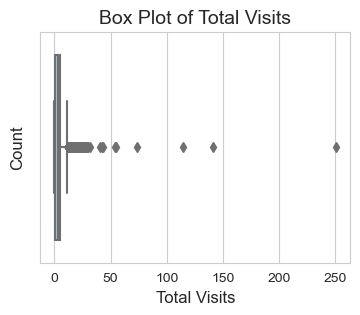

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  # Set the style

plt.figure(figsize=(4, 3))  # Set the figure size

sns.boxplot(x=df['TotalVisits'], color='skyblue')  # Plot the box plot

plt.xlabel('Total Visits', fontsize=12)  # Set x-axis label
plt.ylabel('Count', fontsize=12)  # Set y-axis label
plt.title('Box Plot of Total Visits', fontsize=14)  # Set the plot title

plt.show()  # Show the plot


To remove outliers from the 'TotalVisits' column and plot the box plot again, we can use the concept of interquartile range (IQR) and set a threshold to identify and remove the outliers. 

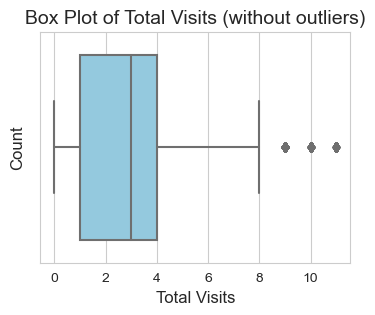

In [43]:

# Calculate the IQR
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1

# Set the threshold to identify outliers
threshold = 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['TotalVisits'] >= Q1 - threshold) & (df['TotalVisits'] <= Q3 + threshold)]

# Plot the box plot without outliers
sns.set_style("whitegrid")
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_no_outliers['TotalVisits'], color='skyblue')
plt.xlabel('Total Visits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Box Plot of Total Visits (without outliers)', fontsize=14)

plt.show()


The box ranges from approximately 1 to 4, indicating that the majority of the Total Visits values fall within this range.
The median, which is located at around 3, suggests that 50% of the Total Visits values are below this point and 50% are above.
The absence of outliers in the plot after removing them suggests that extreme or unusual values in Total Visits have been filtered out.

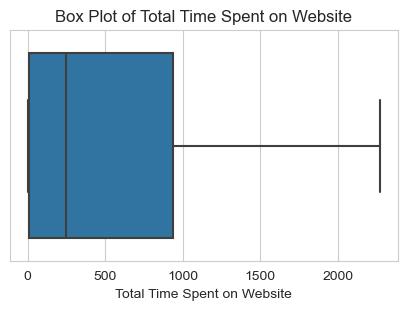

In [56]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.title('Box Plot of Total Time Spent on Website')
plt.show()

the box plot suggests that the majority of the values for 'Total Time Spent on Website' range from approximately 0 to 800, with the median value being around 250. This information provides insights into the distribution and central tendency of the variable.

Calculate measures such as mean, median, and standard deviation.

In [57]:
print('Mean:', df['Page Views Per Visit'].mean())
print('Median:', df['Page Views Per Visit'].median())
print('Standard Deviation:', df['Page Views Per Visit'].std())


Mean: 2.3628199494672093
Median: 2.0
Standard Deviation: 2.161417754559005


* On average, visitors tend to view approximately 2.36 pages per visit.
* The median of 2.0 indicates that half of the visits have 2 or fewer page views, while the other half have more than 2 page views.
* The standard deviation of 2.16 suggests that there is a moderate amount of variability in the number of page views per visit. Some visits may have significantly fewer or more page views than the average.

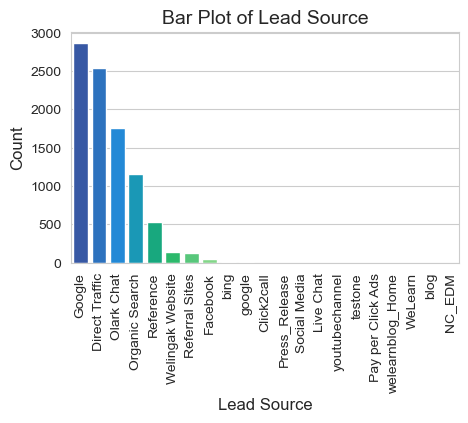

In [76]:
plt.figure(figsize=(5, 3))
sns.set_style("whitegrid")

# Reorder the categories based on count
order = df['Lead Source'].value_counts().index

sns.countplot(x='Lead Source', data=df, order=order, palette='terrain')
plt.xlabel('Lead Source', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bar Plot of Lead Source', fontsize=14)
plt.xticks(rotation=90)
plt.show()


We can observe most of the traffic coming from Google or direct

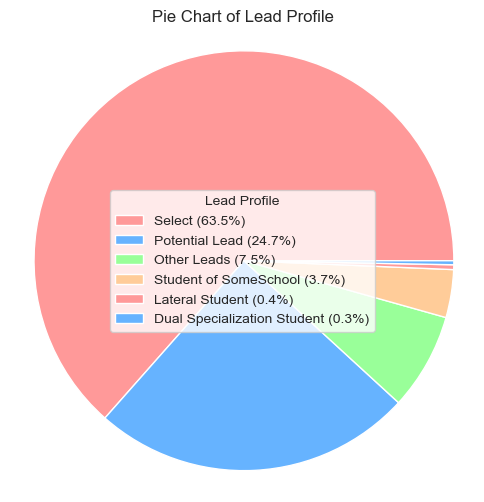

In [85]:
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Plot the pie chart without percentages
patches, _ = plt.pie(df['Lead Profile'].value_counts(), colors=colors)
plt.axis('equal')

# Add the percentages inside the legends
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(df['Lead Profile'].value_counts().index, df['Lead Profile'].value_counts(normalize=True) * 100)]
plt.legend(patches, labels, title='Lead Profile', loc='center')

plt.title('Pie Chart of Lead Profile')
plt.show()


The majority of leads have a profile labeled as "Select," indicating incomplete information. "Potential Lead" is the second most common profile, suggesting further nurturing is required. Other profiles, such as "Student of SomeSchool," "Lateral Student," and "Dual Specialization Student," represent smaller segments that may require tailored marketing approaches.

In [60]:
print(df['City'].value_counts())
print(df['City'].value_counts(normalize=True) * 100)


Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64


The majority of leads are from Mumbai, followed by a significant number of leads with the "Select" city label, indicating incomplete information. Thane & Outskirts, Other Cities, and Other Cities of Maharashtra also contribute to the lead count. Other Metro Cities and Tier II Cities have relatively smaller representation. It suggests a potential focus on targeting leads from Mumbai and further improving the quality and completeness of city information in the dataset.

* Bi variate Analysis:

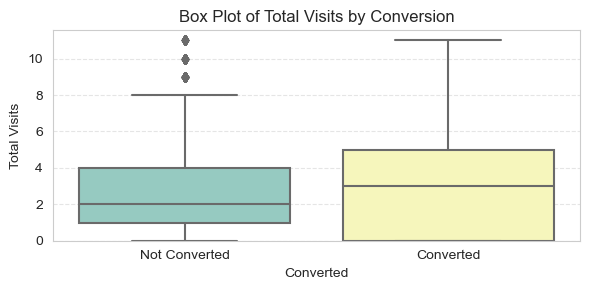

In [54]:
plt.figure(figsize=(6, 3))
sns.boxplot(y='TotalVisits', x='Converted', data=df_no_outliers, palette='Set3')
plt.title('Box Plot of Total Visits by Conversion')
plt.xlabel('Converted')
plt.ylabel('Total Visits')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.ylim(bottom=0)  # Set the lower limit of the y-axis to 0
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


the median of the 'Converted' group is slightly higher than the 'Not Converted' group, it suggests that on average, the 'TotalVisits' tends to be slightly higher for the converted leads compared to the non-converted leads.

The vertical extent of the box indicates the range of values where the majority of the data points lie. For the 'Converted' group, the box extends from approximately 0 to 4.5, while for the 'Not Converted' group, the box extends from approximately 1 to 4. This means that the range of 'TotalVisits' values for the converted leads is slightly wider than the range for the non-converted leads.

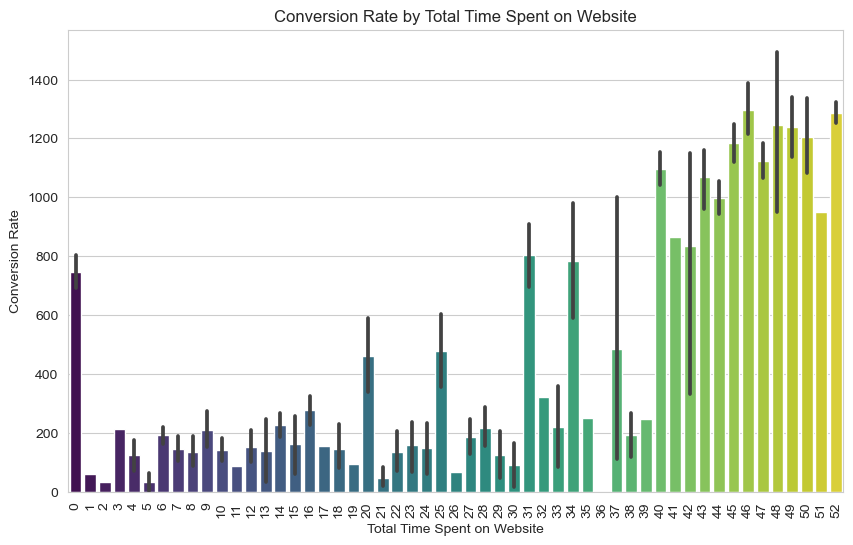

In [98]:
# Group the data by total time spent and calculate the average conversion rate
conversion_rate_by_time = df.groupby('Total Time Spent on Website')['Converted'].mean().reset_index()

# Sort the data by total time spent in ascending order
conversion_rate_by_time = conversion_rate_by_time.sort_values('Total Time Spent on Website')

plt.figure(figsize=(5, 3))
sns.barplot(y='Total Time Spent on Website', x='Converted', data=conversion_rate_by_time, palette='viridis')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Total Time Spent on Website')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()


we can observer the conversion rate increases significanltly for the users who spends more time on the website